In [1]:
import pandas as pd

import random

f= "accepted_2007_to_2018Q4.csv"

num_lines = sum(1 for i in open(f))

num_lines

size= 2_200_000

size

ids= random.sample(range (1, num_lines),size)

len(ids)

df= pd.read_csv(f, skiprows= ids)

df.head()

/tmp/ipykernel_23737/3769484094.py:19: DtypeWarning: Columns (0,19,59,118,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(f, skiprows= ids)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68338832,NaN,1400.0,1400.0,1400.0,36 months,12.88,47.10,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68407301,NaN,27500.0,27500.0,27500.0,60 months,14.85,652.06,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68426865,NaN,20000.0,20000.0,20000.0,36 months,14.85,691.84,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,68367006,NaN,11000.0,11000.0,11000.0,36 months,6.49,337.09,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,66615254,NaN,7200.0,7200.0,7200.0,36 months,17.27,257.67,D,D3,...,NaN,NaN,Cash,Y,May-2018,BROKEN,Nov-2017,2761.0,50.01,10.0


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60701 entries, 0 to 60700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 69.9+ MB
None


In [3]:
import pandas as pd


df_subset = pd.read_csv(f, usecols=['funded_amnt_inv', 'sub_grade'])


print(df_subset.head())


   funded_amnt_inv sub_grade
0           3600.0        C4
1          24700.0        C1
2          20000.0        B4
3          35000.0        C5
4          10400.0        F1


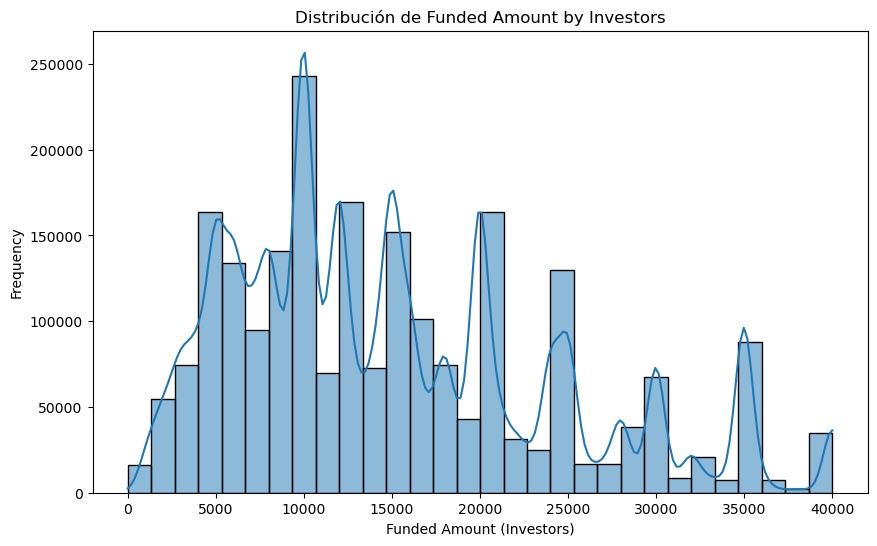

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#funded_amnt_inv
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['funded_amnt_inv'], kde=True, bins=30)
plt.title('Distribución de Funded Amount by Investors')
plt.xlabel('Funded Amount (Investors)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#La variable funded_amnt_inv representa la cantidad de dinero que los inversores realmente financiaron para el préstamo de un solicitante, que en muchos casos puede ser diferente del monto solicitado.La variable refleja la confianza de los inversores en el solicitante, y puede ser relevante para evaluar el comportamiento de pago.
#La descartamos aun así ya que el monto total del préstamo y los pagos son los aspectos que realmente afectan la capacidad del solicitante de pagar el préstamo.

/tmp/ipykernel_23737/806142753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_grade_counts.index, y=sub_grade_counts.values, palette="viridis")


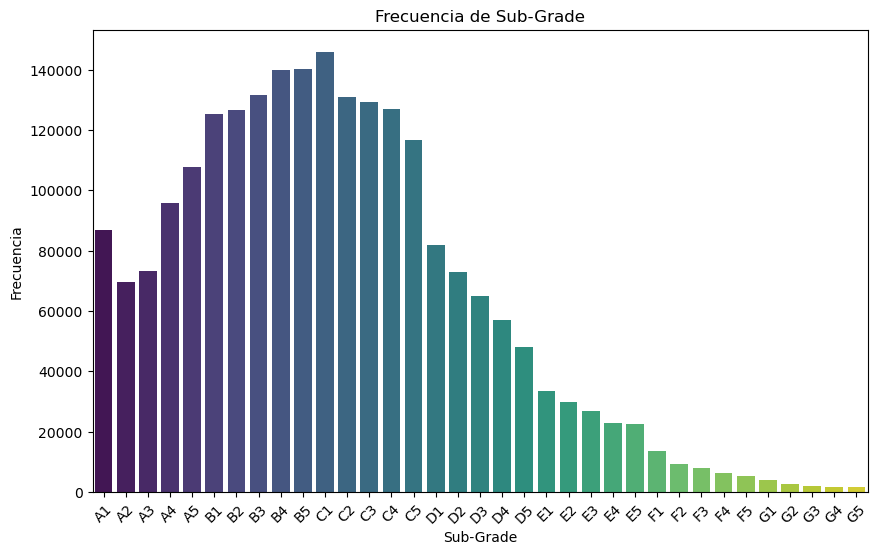

In [5]:
sub_grade_counts = df_subset['sub_grade'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=sub_grade_counts.index, y=sub_grade_counts.values, palette="viridis")
plt.title('Frecuencia de Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#La variable sub_grade representa una subdivisión más detallada de la categoría grade, que clasifica la calidad del crédito de los solicitantes de préstamos por lo que podria haber sido interesante.
#Al final no reincorporamos la variable ya que observamos que la información proporcionada por sub_grade es redundante.